## 1.1 Importing Libs

In [2]:
# Data Preparation Packages
import numpy as np
import pandas as pd

# Graphic Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Packages
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## 1.2 Reading Database

In [3]:
df_pagto = pd.read_csv("payment_en.csv")
df_pagto.head()

,Paid_Debt,Presumed_Income,Age
0,0,1583.33,19
1,0,1666.67,35
2,0,3583.33,26
3,0,4750.00,27
4,0,6333.33,19


## 1.3 Data Preparation
# 1.3.1 Missing Values

In [4]:
df_pagto.isnull().sum()

Paid_Debt          0
Presumed_Income    0
Age                0
dtype: int64

# 1.3.2 Duplications

In [5]:
df_pagto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Paid_Debt        400 non-null    int64  
 1   Presumed_Income  400 non-null    float64
 2   Age              400 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [6]:
df_pagto.duplicated().sum()

np.int64(33)

In [7]:
df_pagto.loc[df_pagto.duplicated()].sort_values('Presumed_Income')

,Paid_Debt,Presumed_Income,Age
150,0,1250.00,26
74,0,1500.00,32
23,1,1833.33,45
383,1,2333.33,49
390,1,2750.00,48
231,0,3500.00,39
393,1,3500.00,60
192,0,3583.33,29
195,0,3583.33,34
246,0,4166.67,35


In [8]:
df_pagto.drop_duplicates(inplace=True)

In [9]:
df_pagto.duplicated().sum()

np.int64(0)

# 1.3.3 Variables types

In [10]:
df_pagto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Paid_Debt        367 non-null    int64  
 1   Presumed_Income  367 non-null    float64
 2   Age              367 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.5 KB


## 1.4 Data Exploratory Analysis
# 1.4.1 Dispersion by class

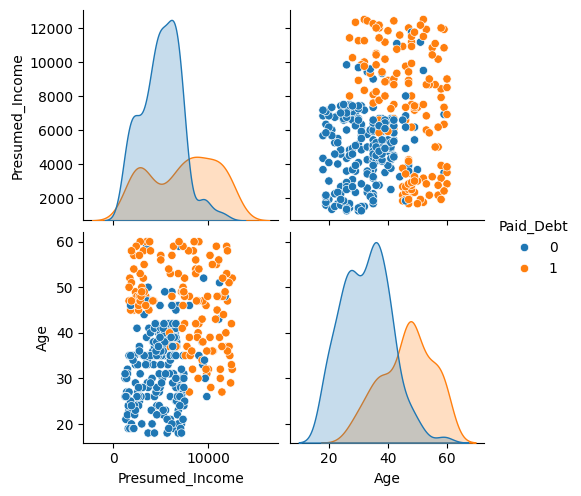

In [12]:
sns.pairplot(df_pagto, hue='Paid_Debt')

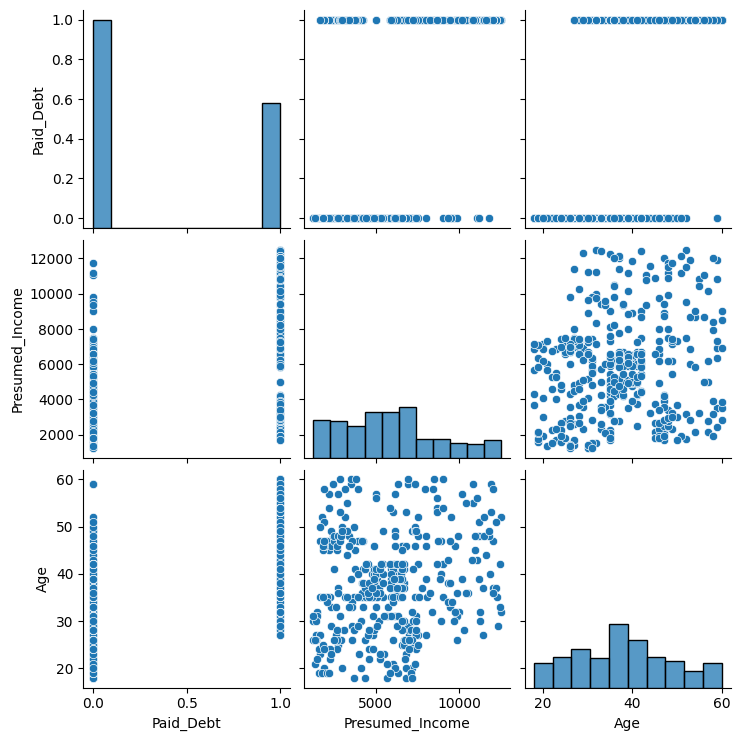

In [13]:
sns.pairplot(df_pagto)

## 1.5 Model's Development: K-Means 
# 1.5.1 Standard Scaler

In [ ]:
# Features selection
df_modelo = df_pagto[['Presumed_Income',
                     'Age']].copy()

# Standard Scaler
x_scaler = StandardScaler()
x_scaler.fit(df_modelo)

df_modelo_scaled = pd.DataFrame(x_scaler.transform(df_modelo),
                                index=df_modelo.index,
                                columns=df_modelo.columns)

In [15]:
df_modelo.describe()

,Presumed_Income,Age
count,367.000000,367.000000
mean,5893.279128,37.722071
std,2897.681266,10.681383
min,1250.000000,18.000000
25%,3583.330000,29.500000
50%,5916.670000,37.000000
75%,7416.670000,46.000000
max,12500.000000,60.000000


In [16]:
df_modelo_scaled.describe()

,Presumed_Income,Age
count,3.670000e+02,367.000000
mean,1.548867e-16,0.000000
std,1.001365e+00,1.001365
min,-1.604600e+00,-1.848917
25%,-7.982599e-01,-0.770808
50%,8.083292e-03,-0.067693
75%,5.264453e-01,0.776045
max,2.283115e+00,2.088526


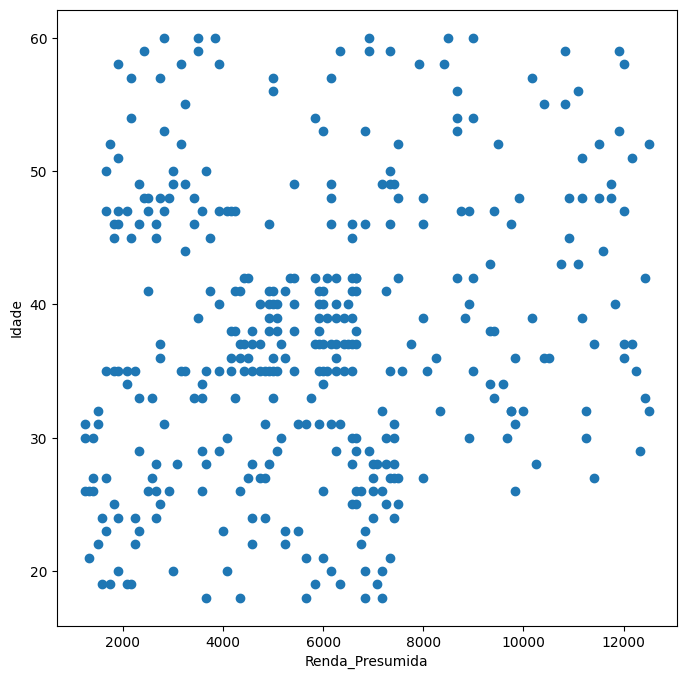

In [ ]:
# Plotting Presumed_Income per Age
fig = plt.figure(figsize=(8,8))
plt.scatter(df_modelo['Presumed_Income'],
            df_modelo['Age']);
plt.xlabel('Presumed_Income');
plt.ylabel('Age');

## 1.5.2 Training Model
Tip: Use the function train_model_kmeans to make it easier to train and evaluate models with different numbers of clusters

In [ ]:
def treina_modelo_kmeans(df_scaled, k, plota_grafico=False):

    # Define and train a model k-means
    modelo_km = KMeans(n_clusters=k, 
                       random_state=42)
    modelo_km.fit(df_scaled)

    # Get the predicted clusters 
    cluster_predito = modelo_km.predict(df_scaled)

    # Plotting the graphs
    if plota_grafico:
        fig = plt.figure(figsize=(8,8))
        sns.scatterplot(x=df_scaled.iloc[:,0],
                        y=df_scaled.iloc[:,1],
                        hue=cluster_predito)
        
        sns.scatterplot(x=modelo_km.cluster_centers_[:,0],
                        y=modelo_km.cluster_centers_[:,1],
                        marker='x', s=300,
                        linewidth=4, color='red', zorder=10);
        
    return modelo_km, cluster_predito

# 1.5.2.1 Model with K = 2

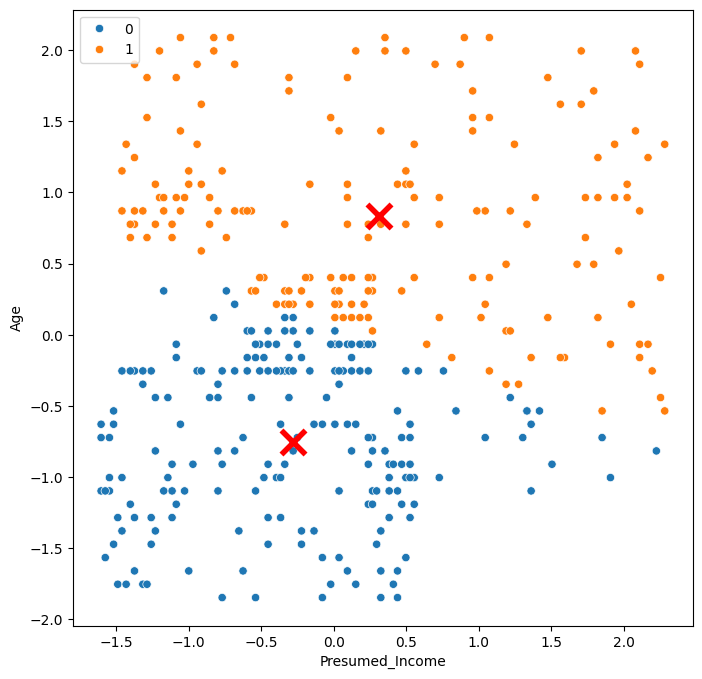

In [18]:
treina_modelo_kmeans(df_scaled=df_modelo_scaled,
                     k=2,
                     plota_grafico=True);

# 1.5.2.2 Model with K = 5

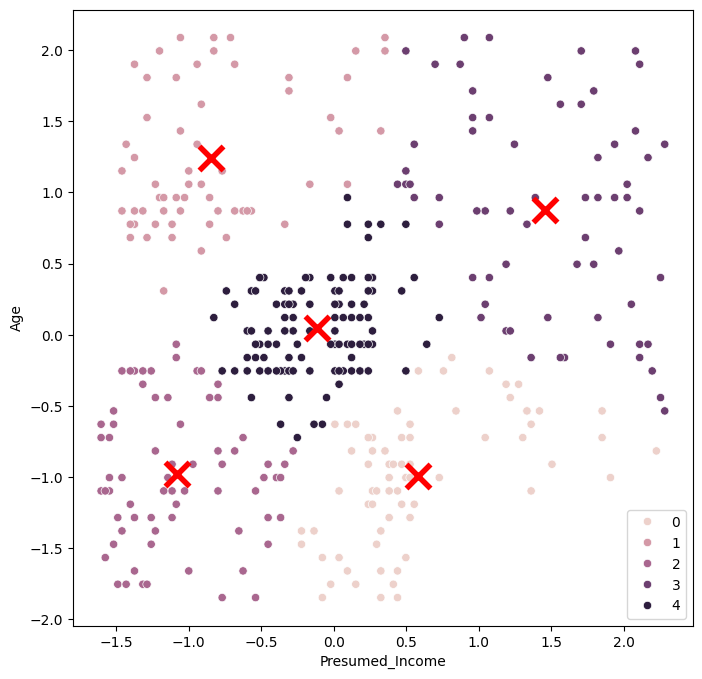

In [19]:
treina_modelo_kmeans(df_scaled=df_modelo_scaled,
                     k=5,
                     plota_grafico=True);

# 1.5.2.3 Model with K = 10

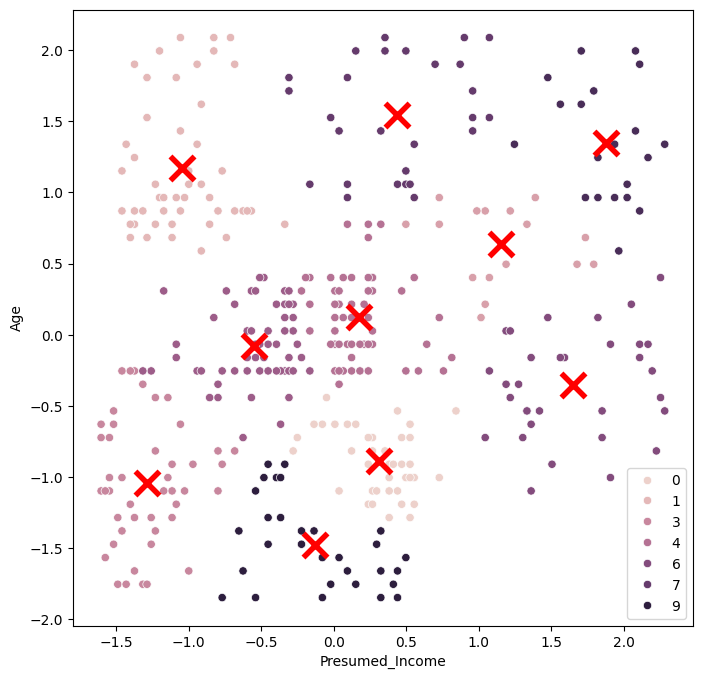

In [20]:
treina_modelo_kmeans(df_scaled=df_modelo_scaled,
                     k=10,
                     plota_grafico=True);

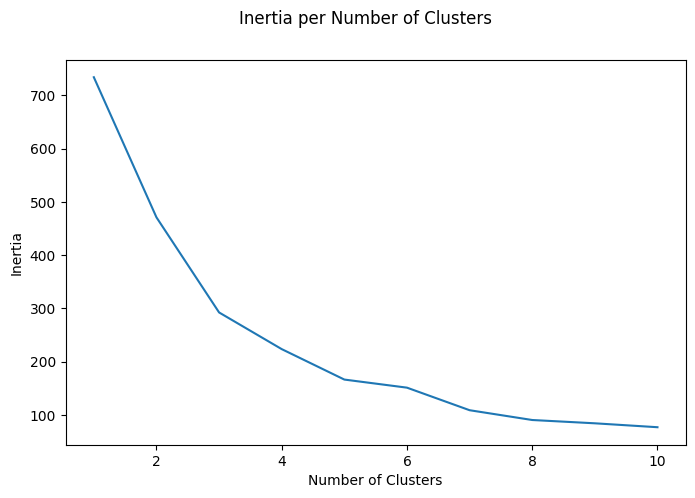

In [ ]:
# Using the Elbow Method (Elbow-curve)
range_n_clusters = np.arange(1,11)
inertia = []
n_clust = []

for num_clusters in range_n_clusters:
    n_clust.append(num_clusters)
    modelo, clust_pred = treina_modelo_kmeans(df_modelo_scaled, 
                                              k=num_clusters)
    
    inertia.append(modelo.inertia_)

fig = plt.figure(figsize=(8,5))
graf = sns.lineplot(x=range_n_clusters,
             y=inertia)
graf.figure.suptitle('Inertia per Number of Clusters');
graf.set_xlabel('Number of Clusters');
graf.set_ylabel('Inertia');

 1 cluster =  700 de inertia
 2 clusters = 500 de inertia
 3 clusters = 300 de inertia
 4 clusters = +200 de inertia (gain was little, therefore k = 3) 

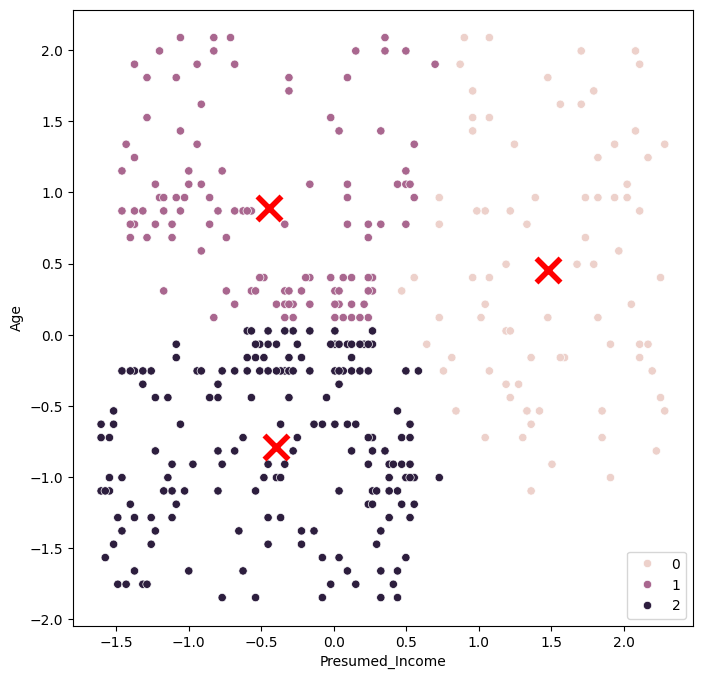

In [22]:
modelo_km3, clusters_predito = treina_modelo_kmeans(df_scaled=df_modelo_scaled,
                                                    k=3,
                                                    plota_grafico=True)

close to presumed income = 0.5, there is a division between clusters
cluster 0 just above the average presumed income
the two clusters on the left are clusters below presumed income = 0.5 (1 and 2)

In [ ]:
# Calculate and print the inertia
inertia = modelo_km3.inertia_
print(f"Model's Inertia: {inertia}")

Model's Inertia: 292.2073243201264


## 1.5.5 Interpretation and Characterization of Clusters
ATTENTION: use the predict method of the model developed on the DataFrame with the standardized variables to identify the clusters of observations in the original DataFrame.

In [25]:
df_modelo['cluster'] = clusters_predito

In [26]:
df_modelo.groupby('cluster').describe().T

cluster                           0            1            2
Presumed_Income count     81.000000   112.000000   174.000000
                mean   10177.984074  4597.470714  4732.758678
                std     1436.730220  1792.644237  1926.146958
                min     7250.000000  1666.670000  1250.000000
                25%     9000.000000  2979.167500  3020.832500
                50%    10000.000000  4833.335000  4916.670000
                75%    11416.670000  6166.670000  6416.670000
                max    12500.000000  7916.670000  8000.000000
Age             count     81.000000   112.000000   174.000000
                mean      42.604938    47.232143    29.327586
                std        9.261046     6.351537     5.936235
                min       26.000000    39.000000    18.000000
                25%       35.000000    41.000000    25.000000
                50%       42.000000    47.000000    29.000000
                75%       49.000000    50.250000    35.000000
                max       60.000000    60.000000    38.000000

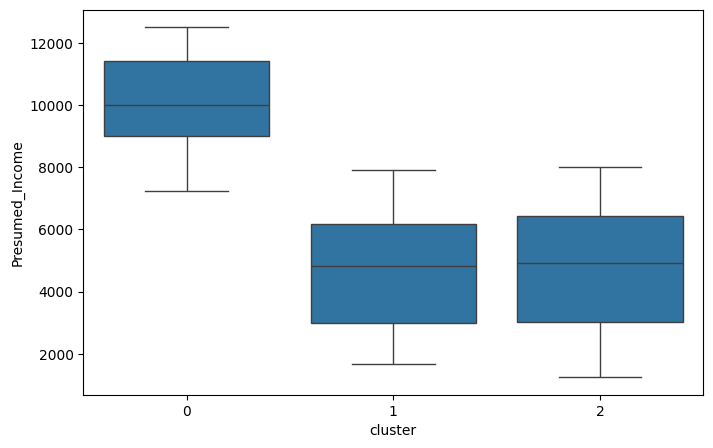

In [ ]:
# Cluster Analysis of presumed income
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='Presumed_Income',
            data=df_modelo);

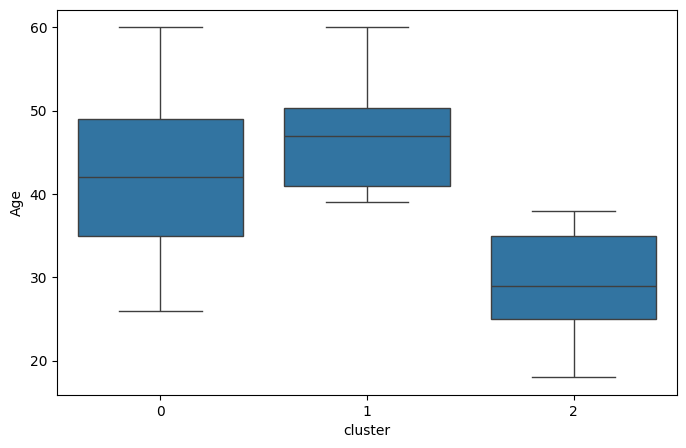

In [ ]:
# cluster analysis of age
fig = plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',
            y='Age',
            data=df_modelo);

## 1.5.6 Cluster evaluation of payment
As payment information was provided on this basis, we also assessed the percentage of customers who
paid their debts in each of the clusters 

In [29]:
df_cluster_divida = pd.concat([df_modelo[['cluster']],
                               df_pagto[['Paid_Debt']]],
                               axis=1)
df_cluster_divida.head()

,cluster,Paid_Debt
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


In [30]:
df_cluster_divida.pivot_table(values='Paid_Debt',
                              index='cluster')

,Paid_Debt
cluster,
0,0.851852
1,0.571429
2,0.028736
